# Twitter dataset analysis

## Run pipelines

In [1]:
# IMPORTS
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
from pipelines import Orchestrator
from analysis_helper import AnalysisHelper

INFO - datasources.tw.tw - load config file
INFO - datasources.tw.proxy_provider - getting proxy list
INFO - datasources.tw.proxy_provider - reading proxy list json file
DEBUG - datasources.tw.tw_api - INIT Tw api
DEBUG - datasources.tw.tw_premium_api - INIT Tw premium api
INFO - datasources.tw.tw - INIT Tw
DEBUG - matplotlib.pyplot - Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [2]:
# LOGGING LEVEL
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

In [3]:
# CONFIGS
project_name = 'uk_healthcare'

cd_config = ('demon', {
    'epsilon': 0.25,
    'min_community_size': 3
})

In [4]:
# PIPELINE
o = Orchestrator(project_name, cd_config)
results = o.execute()

## Analysis

### Event and graph analysis

#### Events summary

In [5]:
display(AnalysisHelper.get_single_summary('event_detection', 'event', results)
        [['start_date', 'end_date', 'location', 'hashtags']])

,start_date,end_date,location,hashtags
name,,,,
16-days-of-action-2018,2018-11-25,2018-12-10,United Kingdom,"[#16days, #16daysofaction, #16daysofactiontool..."
elf-day,2018-12-03,2018-12-12,United Kingdom,"[#elfday, #elfday2018]"
dry-january-2018,2018-01-01,2018-01-31,United Kingdom,[#dryjanuary]
cervical-cancer-prevention-week-2018,2018-01-21,2018-01-27,United Kingdom,[#cervicalcancer]
time-to-talk-day-2018,2018-02-06,2018-02-07,United Kingdom,[#timetotalk]
eating-disorder-awareness-week-2018,2018-02-25,2018-03-03,United Kingdom,"[#edaw18, #edaw2018, #eatingdisordersawareness..."
rare-disease-day-2018,2018-02-28,2018-03-01,United Kingdom,[#rarediseaseday]
ovarian-cancer-awareness-month-2018,2018-03-01,2018-03-31,United Kingdom,"[#ovariancancer, #ovariancancerawareness, #ova..."
nutrition-and-hydration-week-2018,2018-03-11,2018-03-17,United Kingdom,"[#nutritionandhydrationweek, #NHW2018]"


#### Event's graphs

In [6]:
graph_summaries = AnalysisHelper.get_single_summary('network_creation', 'graph_summary', results)
graph_summaries['scc_over_nodes'] = graph_summaries.apply(lambda x: x['strongly_conn_components']/x['no_nodes'], axis=1)
display(graph_summaries.describe())
display(graph_summaries)

,assortativity,avg_clustering,avg_degree,avg_weighted_degree,density,no_edges,no_nodes,strongly_conn_components,scc_over_nodes
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,-0.221464,0.048892,2.040124,2.215372,0.004408,253.000000,254.160000,250.280000,0.982820
std,0.137124,0.041081,0.457748,0.619554,0.002155,60.266077,59.011778,59.786788,0.019968
min,-0.561400,0.000000,1.401400,1.433400,0.002200,177.000000,141.000000,130.000000,0.921986
25%,-0.283300,0.019500,1.762600,1.909100,0.003200,209.000000,215.000000,212.000000,0.978082
50%,-0.194700,0.038900,1.910900,1.984400,0.003800,235.000000,256.000000,253.000000,0.988281
75%,-0.136900,0.070000,2.227300,2.498600,0.004800,281.000000,293.000000,289.000000,0.996732
max,0.004900,0.166500,3.319100,4.141800,0.011900,436.000000,396.000000,394.000000,1.000000


,assortativity,avg_clustering,avg_degree,avg_weighted_degree,connected,density,no_edges,no_nodes,strongly_conn_components,scc_over_nodes
name,,,,,,,,,,
16-days-of-action-2018,-0.1319,0.0100,1.7626,1.9091,False,0.0022,349,396,394,0.994949
elf-day,-0.1822,0.1003,2.3890,2.4986,False,0.0033,436,365,357,0.978082
dry-january-2018,-0.2833,0.0276,1.9915,2.0170,False,0.0043,234,235,231,0.982979
cervical-cancer-prevention-week-2018,-0.0909,0.0612,1.8373,1.9522,False,0.0044,192,209,204,0.976077
time-to-talk-day-2018,-0.2489,0.0389,1.7239,1.9254,False,0.0032,231,268,265,0.988806
eating-disorder-awareness-week-2018,-0.1544,0.0304,1.8828,1.9844,False,0.0037,241,256,253,0.988281
rare-disease-day-2018,-0.2443,0.0000,1.4014,1.4694,False,0.0024,206,294,294,1.000000
ovarian-cancer-awareness-month-2018,-0.3707,0.0499,1.8791,1.9628,False,0.0044,202,215,212,0.986047
nutrition-and-hydration-week-2018,-0.2841,0.0559,2.3883,2.7546,False,0.0044,326,273,269,0.985348


* *# nodes*: number of users.
* *# edges*: number of relations between users.
* *avg degree*: average number of edges per node.
* *avg degree*: average weigth sum per node.
* *density*: expresses the how sparse is the adjacency matrix (i.e. how likely that a node has edges). 0 for a graph without edges and 1 for a complete graph.

\begin{align}
&\begin{aligned}
d = \frac{m}{n(n-1)}
\end{aligned}\\
&\begin{aligned}
m = \text{# edges}
\end{aligned}\\
&\begin{aligned}
n = \text{# nodes}
\end{aligned}
\end{align}

* *connected*: for each pairs of nodes exists a path that connects them.
* *strongly connected components*: group of nodes for which for each pair of nodes exists a path that connects them. Can be broadly relatable to the concept of community.
* *avg clustering*: average for each node of the fraction of possible triangles through that node that exist.
* *assortativity*: measures how much nodes are likely to connect to nodes with the same degree (>0) or with a different degree (<0).

### Community Detection analysis

#### Partitions summary

In [7]:
partitions_summary = AnalysisHelper.get_multi_summary('community_detection', 'partition_summary', results)

for ds_name, ds in partitions_summary.items():
    print(f'event "{ds_name}":')
    display(ds)
    display(ds.describe())

event "16-days-of-action-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
0,396,349,1.7626,1.9091,0.0022,False,394,0.01,-0.1319


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,1.0,1.0,1.0000,1.0000,1.0000,1.0,1.00,1.0000
mean,396.0,349.0,1.7626,1.9091,0.0022,394.0,0.01,-0.1319
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,396.0,349.0,1.7626,1.9091,0.0022,394.0,0.01,-0.1319
25%,396.0,349.0,1.7626,1.9091,0.0022,394.0,0.01,-0.1319
50%,396.0,349.0,1.7626,1.9091,0.0022,394.0,0.01,-0.1319
75%,396.0,349.0,1.7626,1.9091,0.0022,394.0,0.01,-0.1319
max,396.0,349.0,1.7626,1.9091,0.0022,394.0,0.01,-0.1319


event "elf-day":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
0,5,10,4.0000,4.4,0.5000,True,3,0.4882,-0.4082
1,11,27,4.9091,6.0,0.2455,True,9,0.4245,-0.2781


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,8.000000,18.500000,4.454550,5.200000,0.372750,6.000000,0.456350,-0.343150
std,4.242641,12.020815,0.642831,1.131371,0.179959,4.242641,0.045043,0.091995
min,5.000000,10.000000,4.000000,4.400000,0.245500,3.000000,0.424500,-0.408200
25%,6.500000,14.250000,4.227275,4.800000,0.309125,4.500000,0.440425,-0.375675
50%,8.000000,18.500000,4.454550,5.200000,0.372750,6.000000,0.456350,-0.343150
75%,9.500000,22.750000,4.681825,5.600000,0.436375,7.500000,0.472275,-0.310625
max,11.000000,27.000000,4.909100,6.000000,0.500000,9.000000,0.488200,-0.278100


event "dry-january-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
0,4,6,3.0,3.0,0.5,True,3,0.45,NaN


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,1.0,1.0,1.0,1.0,1.0,1.0,1.00,0.0
mean,4.0,6.0,3.0,3.0,0.5,3.0,0.45,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,4.0,6.0,3.0,3.0,0.5,3.0,0.45,NaN
25%,4.0,6.0,3.0,3.0,0.5,3.0,0.45,NaN
50%,4.0,6.0,3.0,3.0,0.5,3.0,0.45,NaN
75%,4.0,6.0,3.0,3.0,0.5,3.0,0.45,NaN
max,4.0,6.0,3.0,3.0,0.5,3.0,0.45,NaN


event "cervical-cancer-prevention-week-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
0,4,9,4.5,4.5,0.7500,True,2,0.6833,NaN
1,4,7,3.5,5.5,0.5833,True,3,0.4500,-0.1667


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,2.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.0000
mean,4.0,8.000000,4.000000,5.000000,0.666650,2.500000,0.566650,-0.1667
std,0.0,1.414214,0.707107,0.707107,0.117875,0.707107,0.164968,NaN
min,4.0,7.000000,3.500000,4.500000,0.583300,2.000000,0.450000,-0.1667
25%,4.0,7.500000,3.750000,4.750000,0.624975,2.250000,0.508325,-0.1667
50%,4.0,8.000000,4.000000,5.000000,0.666650,2.500000,0.566650,-0.1667
75%,4.0,8.500000,4.250000,5.250000,0.708325,2.750000,0.624975,-0.1667
max,4.0,9.000000,4.500000,5.500000,0.750000,3.000000,0.683300,-0.1667


event "time-to-talk-day-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
0,4,8,4.0,4.0,0.6667,True,3,0.5833,-0.3333


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,1.0,1.0,1.0,1.0,1.0000,1.0,1.0000,1.0000
mean,4.0,8.0,4.0,4.0,0.6667,3.0,0.5833,-0.3333
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,4.0,8.0,4.0,4.0,0.6667,3.0,0.5833,-0.3333
25%,4.0,8.0,4.0,4.0,0.6667,3.0,0.5833,-0.3333
50%,4.0,8.0,4.0,4.0,0.6667,3.0,0.5833,-0.3333
75%,4.0,8.0,4.0,4.0,0.6667,3.0,0.5833,-0.3333
max,4.0,8.0,4.0,4.0,0.6667,3.0,0.5833,-0.3333


event "eating-disorder-awareness-week-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
0,5,11,4.4,4.4,0.5500,True,4,0.5444,-0.2887
1,4,11,5.5,5.5,0.9167,True,2,0.8125,-0.2887


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,2.000000,2.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.0000
mean,4.500000,11.0,4.950000,4.950000,0.733350,3.000000,0.678450,-0.2887
std,0.707107,0.0,0.777817,0.777817,0.259296,1.414214,0.189575,0.0000
min,4.000000,11.0,4.400000,4.400000,0.550000,2.000000,0.544400,-0.2887
25%,4.250000,11.0,4.675000,4.675000,0.641675,2.500000,0.611425,-0.2887
50%,4.500000,11.0,4.950000,4.950000,0.733350,3.000000,0.678450,-0.2887
75%,4.750000,11.0,5.225000,5.225000,0.825025,3.500000,0.745475,-0.2887
max,5.000000,11.0,5.500000,5.500000,0.916700,4.000000,0.812500,-0.2887


event "rare-disease-day-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
0,294,206,1.4014,1.4694,0.0024,False,294,0.0,-0.2443


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,1.0,1.0,1.0000,1.0000,1.0000,1.0,1.0,1.0000
mean,294.0,206.0,1.4014,1.4694,0.0024,294.0,0.0,-0.2443
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,294.0,206.0,1.4014,1.4694,0.0024,294.0,0.0,-0.2443
25%,294.0,206.0,1.4014,1.4694,0.0024,294.0,0.0,-0.2443
50%,294.0,206.0,1.4014,1.4694,0.0024,294.0,0.0,-0.2443
75%,294.0,206.0,1.4014,1.4694,0.0024,294.0,0.0,-0.2443
max,294.0,206.0,1.4014,1.4694,0.0024,294.0,0.0,-0.2443


event "ovarian-cancer-awareness-month-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
0,215,202,1.8791,1.9628,0.0044,False,212,0.0499,-0.3707


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,1.0,1.0,1.0000,1.0000,1.0000,1.0,1.0000,1.0000
mean,215.0,202.0,1.8791,1.9628,0.0044,212.0,0.0499,-0.3707
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,215.0,202.0,1.8791,1.9628,0.0044,212.0,0.0499,-0.3707
25%,215.0,202.0,1.8791,1.9628,0.0044,212.0,0.0499,-0.3707
50%,215.0,202.0,1.8791,1.9628,0.0044,212.0,0.0499,-0.3707
75%,215.0,202.0,1.8791,1.9628,0.0044,212.0,0.0499,-0.3707
max,215.0,202.0,1.8791,1.9628,0.0044,212.0,0.0499,-0.3707


event "nutrition-and-hydration-week-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
0,11,38,6.9091,10.5455,0.3455,True,8,0.6461,-0.1439
1,6,14,4.6667,4.6667,0.4667,True,5,0.5310,-0.2582


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,8.500000,26.000000,5.787900,7.606100,0.406100,6.50000,0.588550,-0.201050
std,3.535534,16.970563,1.585616,4.156939,0.085701,2.12132,0.081388,0.080822
min,6.000000,14.000000,4.666700,4.666700,0.345500,5.00000,0.531000,-0.258200
25%,7.250000,20.000000,5.227300,6.136400,0.375800,5.75000,0.559775,-0.229625
50%,8.500000,26.000000,5.787900,7.606100,0.406100,6.50000,0.588550,-0.201050
75%,9.750000,32.000000,6.348500,9.075800,0.436400,7.25000,0.617325,-0.172475
max,11.000000,38.000000,6.909100,10.545500,0.466700,8.00000,0.646100,-0.143900


event "brain-awareness-week-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
0,307,281,1.8306,1.9349,0.003,False,306,0.0243,-0.0818


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,1.0,1.0,1.0000,1.0000,1.000,1.0,1.0000,1.0000
mean,307.0,281.0,1.8306,1.9349,0.003,306.0,0.0243,-0.0818
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,307.0,281.0,1.8306,1.9349,0.003,306.0,0.0243,-0.0818
25%,307.0,281.0,1.8306,1.9349,0.003,306.0,0.0243,-0.0818
50%,307.0,281.0,1.8306,1.9349,0.003,306.0,0.0243,-0.0818
75%,307.0,281.0,1.8306,1.9349,0.003,306.0,0.0243,-0.0818
max,307.0,281.0,1.8306,1.9349,0.003,306.0,0.0243,-0.0818


event "no-smoking-day-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
0,254,219,1.7244,1.8425,0.0034,False,249,0.0397,-0.2731


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,1.0,1.0,1.0000,1.0000,1.0000,1.0,1.0000,1.0000
mean,254.0,219.0,1.7244,1.8425,0.0034,249.0,0.0397,-0.2731
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,254.0,219.0,1.7244,1.8425,0.0034,249.0,0.0397,-0.2731
25%,254.0,219.0,1.7244,1.8425,0.0034,249.0,0.0397,-0.2731
50%,254.0,219.0,1.7244,1.8425,0.0034,249.0,0.0397,-0.2731
75%,254.0,219.0,1.7244,1.8425,0.0034,249.0,0.0397,-0.2731
max,254.0,219.0,1.7244,1.8425,0.0034,249.0,0.0397,-0.2731


event "epilepsy-awareness-purple-day-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
0,306,252,1.6471,1.732,0.0027,False,305,0.0118,-0.1947


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,1.0,1.0,1.0000,1.000,1.0000,1.0,1.0000,1.0000
mean,306.0,252.0,1.6471,1.732,0.0027,305.0,0.0118,-0.1947
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,306.0,252.0,1.6471,1.732,0.0027,305.0,0.0118,-0.1947
25%,306.0,252.0,1.6471,1.732,0.0027,305.0,0.0118,-0.1947
50%,306.0,252.0,1.6471,1.732,0.0027,305.0,0.0118,-0.1947
75%,306.0,252.0,1.6471,1.732,0.0027,305.0,0.0118,-0.1947
max,306.0,252.0,1.6471,1.732,0.0027,305.0,0.0118,-0.1947


event "experience-of-care-week-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
0,5,7,2.8,5.6,0.3500,True,5,0.3833,-0.3536
1,8,20,5.0,5.0,0.3571,True,7,0.5311,-0.2182


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000
mean,6.50000,13.500000,3.900000,5.300000,0.353550,6.000000,0.45720,-0.285900
std,2.12132,9.192388,1.555635,0.424264,0.005020,1.414214,0.10451,0.095742
min,5.00000,7.000000,2.800000,5.000000,0.350000,5.000000,0.38330,-0.353600
25%,5.75000,10.250000,3.350000,5.150000,0.351775,5.500000,0.42025,-0.319750
50%,6.50000,13.500000,3.900000,5.300000,0.353550,6.000000,0.45720,-0.285900
75%,7.25000,16.750000,4.450000,5.450000,0.355325,6.500000,0.49415,-0.252050
max,8.00000,20.000000,5.000000,5.600000,0.357100,7.000000,0.53110,-0.218200


event "brain-injury-week-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
0,4,8,4.0,5.5,0.6667,True,2,0.4792,-0.5774
1,4,8,4.0,4.5,0.6667,True,3,0.5833,-0.3333
2,5,11,4.4,6.0,0.5500,True,4,0.4389,-0.2809


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.0,3.000000,3.000000
mean,4.333333,9.000000,4.133333,5.333333,0.627800,3.0,0.500467,-0.397200
std,0.577350,1.732051,0.230940,0.763763,0.067377,1.0,0.074512,0.158242
min,4.000000,8.000000,4.000000,4.500000,0.550000,2.0,0.438900,-0.577400
25%,4.000000,8.000000,4.000000,5.000000,0.608350,2.5,0.459050,-0.455350
50%,4.000000,8.000000,4.000000,5.500000,0.666700,3.0,0.479200,-0.333300
75%,4.500000,9.500000,4.200000,5.750000,0.666700,3.5,0.531250,-0.307100
max,5.000000,11.000000,4.400000,6.000000,0.666700,4.0,0.583300,-0.280900


event "mental-health-awareness-week-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
0,268,245,1.8284,1.8657,0.0034,False,267,0.0376,-0.4722


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,1.0,1.0,1.0000,1.0000,1.0000,1.0,1.0000,1.0000
mean,268.0,245.0,1.8284,1.8657,0.0034,267.0,0.0376,-0.4722
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,268.0,245.0,1.8284,1.8657,0.0034,267.0,0.0376,-0.4722
25%,268.0,245.0,1.8284,1.8657,0.0034,267.0,0.0376,-0.4722
50%,268.0,245.0,1.8284,1.8657,0.0034,267.0,0.0376,-0.4722
75%,268.0,245.0,1.8284,1.8657,0.0034,267.0,0.0376,-0.4722
max,268.0,245.0,1.8284,1.8657,0.0034,267.0,0.0376,-0.4722


event "dementia-action-week-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
0,5,10,4.0000,4.4000,0.5000,True,2,0.4000,-0.2722
1,9,26,5.7778,5.7778,0.3611,True,7,0.7907,-0.1925
2,6,14,4.6667,4.6667,0.4667,True,5,0.5310,-0.2582


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,6.666667,16.666667,4.814833,4.948166,0.442600,4.666667,0.573900,-0.240967
std,2.081666,8.326664,0.898110,0.730754,0.072518,2.516611,0.198852,0.042553
min,5.000000,10.000000,4.000000,4.400000,0.361100,2.000000,0.400000,-0.272200
25%,5.500000,12.000000,4.333350,4.533350,0.413900,3.500000,0.465500,-0.265200
50%,6.000000,14.000000,4.666700,4.666700,0.466700,5.000000,0.531000,-0.258200
75%,7.500000,20.000000,5.222250,5.222250,0.483350,6.000000,0.660850,-0.225350
max,9.000000,26.000000,5.777800,5.777800,0.500000,7.000000,0.790700,-0.192500


event "mnd-awareness-month-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
0,6,11,3.6667,3.6667,0.3667,True,5,0.3909,-0.4770
1,14,55,7.8571,12.0000,0.3022,True,7,0.6240,-0.6739
2,8,23,5.7500,5.7500,0.4107,True,6,0.7794,-0.2041


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.0,3.000000,3.000000
mean,9.333333,29.666667,5.757933,7.138900,0.359867,6.0,0.598100,-0.451667
std,4.163332,22.744963,2.095211,4.336791,0.054572,1.0,0.195541,0.235922
min,6.000000,11.000000,3.666700,3.666700,0.302200,5.0,0.390900,-0.673900
25%,7.000000,17.000000,4.708350,4.708350,0.334450,5.5,0.507450,-0.575450
50%,8.000000,23.000000,5.750000,5.750000,0.366700,6.0,0.624000,-0.477000
75%,11.000000,39.000000,6.803550,8.875000,0.388700,6.5,0.701700,-0.340550
max,14.000000,55.000000,7.857100,12.000000,0.410700,7.0,0.779400,-0.204100


event "wear-purple-for-jia-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
0,20,57,5.7,8.0,0.15,True,15,0.319,-0.3601


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,1.0,1.0,1.0,1.0,1.00,1.0,1.000,1.0000
mean,20.0,57.0,5.7,8.0,0.15,15.0,0.319,-0.3601
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,20.0,57.0,5.7,8.0,0.15,15.0,0.319,-0.3601
25%,20.0,57.0,5.7,8.0,0.15,15.0,0.319,-0.3601
50%,20.0,57.0,5.7,8.0,0.15,15.0,0.319,-0.3601
75%,20.0,57.0,5.7,8.0,0.15,15.0,0.319,-0.3601
max,20.0,57.0,5.7,8.0,0.15,15.0,0.319,-0.3601


event "carers-week-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
0,8,23,5.75,13.0,0.4107,True,3,0.4985,-0.2282


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,1.0,1.0,1.00,1.0,1.0000,1.0,1.0000,1.0000
mean,8.0,23.0,5.75,13.0,0.4107,3.0,0.4985,-0.2282
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,8.0,23.0,5.75,13.0,0.4107,3.0,0.4985,-0.2282
25%,8.0,23.0,5.75,13.0,0.4107,3.0,0.4985,-0.2282
50%,8.0,23.0,5.75,13.0,0.4107,3.0,0.4985,-0.2282
75%,8.0,23.0,5.75,13.0,0.4107,3.0,0.4985,-0.2282
max,8.0,23.0,5.75,13.0,0.4107,3.0,0.4985,-0.2282


event "national-dementia-carers-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
0,184,177,1.9239,2.0978,0.0053,False,184,0.0195,-0.2252


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,1.0,1.0,1.0000,1.0000,1.0000,1.0,1.0000,1.0000
mean,184.0,177.0,1.9239,2.0978,0.0053,184.0,0.0195,-0.2252
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,184.0,177.0,1.9239,2.0978,0.0053,184.0,0.0195,-0.2252
25%,184.0,177.0,1.9239,2.0978,0.0053,184.0,0.0195,-0.2252
50%,184.0,177.0,1.9239,2.0978,0.0053,184.0,0.0195,-0.2252
75%,184.0,177.0,1.9239,2.0978,0.0053,184.0,0.0195,-0.2252
max,184.0,177.0,1.9239,2.0978,0.0053,184.0,0.0195,-0.2252


event "mens-health-week-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
0,264,214,1.6212,1.6364,0.0031,False,262,0.0281,-0.1814


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,1.0,1.0,1.0000,1.0000,1.0000,1.0,1.0000,1.0000
mean,264.0,214.0,1.6212,1.6364,0.0031,262.0,0.0281,-0.1814
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,264.0,214.0,1.6212,1.6364,0.0031,262.0,0.0281,-0.1814
25%,264.0,214.0,1.6212,1.6364,0.0031,262.0,0.0281,-0.1814
50%,264.0,214.0,1.6212,1.6364,0.0031,262.0,0.0281,-0.1814
75%,264.0,214.0,1.6212,1.6364,0.0031,262.0,0.0281,-0.1814
max,264.0,214.0,1.6212,1.6364,0.0031,262.0,0.0281,-0.1814


event "stress-awareness-day":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
0,293,209,1.4266,1.4334,0.0024,False,293,0.0,-0.2306


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,1.0,1.0,1.0000,1.0000,1.0000,1.0,1.0,1.0000
mean,293.0,209.0,1.4266,1.4334,0.0024,293.0,0.0,-0.2306
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,293.0,209.0,1.4266,1.4334,0.0024,293.0,0.0,-0.2306
25%,293.0,209.0,1.4266,1.4334,0.0024,293.0,0.0,-0.2306
50%,293.0,209.0,1.4266,1.4334,0.0024,293.0,0.0,-0.2306
75%,293.0,209.0,1.4266,1.4334,0.0024,293.0,0.0,-0.2306
max,293.0,209.0,1.4266,1.4334,0.0024,293.0,0.0,-0.2306


event "national-dyslexia-week-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
0,229,235,2.0524,2.0786,0.0045,False,228,0.0746,-0.1919


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,1.0,1.0,1.0000,1.0000,1.0000,1.0,1.0000,1.0000
mean,229.0,235.0,2.0524,2.0786,0.0045,228.0,0.0746,-0.1919
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,229.0,235.0,2.0524,2.0786,0.0045,228.0,0.0746,-0.1919
25%,229.0,235.0,2.0524,2.0786,0.0045,228.0,0.0746,-0.1919
50%,229.0,235.0,2.0524,2.0786,0.0045,228.0,0.0746,-0.1919
75%,229.0,235.0,2.0524,2.0786,0.0045,228.0,0.0746,-0.1919
max,229.0,235.0,2.0524,2.0786,0.0045,228.0,0.0746,-0.1919


event "ocd-awareness-week-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
0,202,193,1.9109,1.9505,0.0048,False,202,0.0118,-0.5614


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,1.0,1.0,1.0000,1.0000,1.0000,1.0,1.0000,1.0000
mean,202.0,193.0,1.9109,1.9505,0.0048,202.0,0.0118,-0.5614
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,202.0,193.0,1.9109,1.9505,0.0048,202.0,0.0118,-0.5614
25%,202.0,193.0,1.9109,1.9505,0.0048,202.0,0.0118,-0.5614
50%,202.0,193.0,1.9109,1.9505,0.0048,202.0,0.0118,-0.5614
75%,202.0,193.0,1.9109,1.9505,0.0048,202.0,0.0118,-0.5614
max,202.0,193.0,1.9109,1.9505,0.0048,202.0,0.0118,-0.5614


event "jeans-for-genes-day":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
0,246,325,2.6423,2.935,0.0054,False,246,0.0081,-0.1508


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,1.0,1.0,1.0000,1.000,1.0000,1.0,1.0000,1.0000
mean,246.0,325.0,2.6423,2.935,0.0054,246.0,0.0081,-0.1508
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,246.0,325.0,2.6423,2.935,0.0054,246.0,0.0081,-0.1508
25%,246.0,325.0,2.6423,2.935,0.0054,246.0,0.0081,-0.1508
50%,246.0,325.0,2.6423,2.935,0.0054,246.0,0.0081,-0.1508
75%,246.0,325.0,2.6423,2.935,0.0054,246.0,0.0081,-0.1508
max,246.0,325.0,2.6423,2.935,0.0054,246.0,0.0081,-0.1508


For each context provide all the communities and the related metrics.

**important**: if the community detection algorithm fails to provide a community, the whole network is considered as a single community.

In [8]:
display(AnalysisHelper.community_over_nonodes_ratio(results))

,community/no_nodes ratio
name,
16-days-of-action-2018,0.002525
elf-day,0.125000
dry-january-2018,0.250000
cervical-cancer-prevention-week-2018,0.250000
time-to-talk-day-2018,0.250000
eating-disorder-awareness-week-2018,0.222222
rare-disease-day-2018,0.003401
ovarian-cancer-awareness-month-2018,0.004651
nutrition-and-hydration-week-2018,0.117647


For each context determine the ratio of found communities over the number of nodes chosen to be part of a community.

#### Partition quality metrics

In [9]:
pquality = AnalysisHelper.get_multi_summary('community_detection', 'pquality', results)

for ds_name, ds in pquality.items():
    print(f'event "{ds_name}":')
    display(ds)

event "16-days-of-action-2018":


,min,max,avg,std
index,,,,
internal_density,0.001116,0.001116,0.001116,0.0
edges_inside,349.000000,349.000000,349.000000,0.0
normalized_cut,0.000000,0.000000,0.000000,0.0
avg_degree,1.762626,1.762626,1.762626,0.0
fomd,0.353535,0.353535,0.353535,0.0
expansion,0.000000,0.000000,0.000000,0.0
cut_ratio,0.000000,0.000000,0.000000,0.0
conductance,0.000000,0.000000,0.000000,0.0
max_odf,0.000000,0.000000,0.000000,0.0


event "elf-day":


,min,max,avg,std
index,,,,
internal_density,0.122727,0.250000,0.186364,0.063636
edges_inside,10.000000,27.000000,18.500000,8.500000
normalized_cut,0.000000,0.000000,0.000000,0.000000
avg_degree,4.000000,4.909091,4.454545,0.454545
fomd,0.200000,0.363636,0.281818,0.081818
expansion,0.000000,0.000000,0.000000,0.000000
cut_ratio,0.000000,0.000000,0.000000,0.000000
conductance,0.000000,0.000000,0.000000,0.000000
max_odf,0.000000,0.000000,0.000000,0.000000


event "dry-january-2018":


,min,max,avg,std
index,,,,
internal_density,0.25,0.25,0.25,0.0
edges_inside,6.00,6.00,6.00,0.0
normalized_cut,0.00,0.00,0.00,0.0
avg_degree,3.00,3.00,3.00,0.0
fomd,0.25,0.25,0.25,0.0
expansion,0.00,0.00,0.00,0.0
cut_ratio,0.00,0.00,0.00,0.0
conductance,0.00,0.00,0.00,0.0
max_odf,0.00,0.00,0.00,0.0


event "cervical-cancer-prevention-week-2018":


,min,max,avg,std
index,,,,
internal_density,0.291667,0.375,0.333333,0.041667
edges_inside,7.000000,9.000,8.000000,1.000000
normalized_cut,0.000000,0.000,0.000000,0.000000
avg_degree,3.500000,4.500,4.000000,0.500000
fomd,0.500000,0.500,0.500000,0.000000
expansion,0.000000,0.000,0.000000,0.000000
cut_ratio,0.000000,0.000,0.000000,0.000000
conductance,0.000000,0.000,0.000000,0.000000
max_odf,0.000000,0.000,0.000000,0.000000


event "time-to-talk-day-2018":


,min,max,avg,std
index,,,,
internal_density,0.333333,0.333333,0.333333,0.0
edges_inside,8.000000,8.000000,8.000000,0.0
normalized_cut,0.000000,0.000000,0.000000,0.0
avg_degree,4.000000,4.000000,4.000000,0.0
fomd,0.500000,0.500000,0.500000,0.0
expansion,0.000000,0.000000,0.000000,0.0
cut_ratio,0.000000,0.000000,0.000000,0.0
conductance,0.000000,0.000000,0.000000,0.0
max_odf,0.000000,0.000000,0.000000,0.0


event "eating-disorder-awareness-week-2018":


,min,max,avg,std
index,,,,
internal_density,0.275,0.458333,0.366667,0.091667
edges_inside,11.000,11.000000,11.000000,0.000000
normalized_cut,0.000,0.000000,0.000000,0.000000
avg_degree,4.400,5.500000,4.950000,0.550000
fomd,0.400,0.500000,0.450000,0.050000
expansion,0.000,0.000000,0.000000,0.000000
cut_ratio,0.000,0.000000,0.000000,0.000000
conductance,0.000,0.000000,0.000000,0.000000
max_odf,0.000,0.000000,0.000000,0.000000


event "rare-disease-day-2018":


,min,max,avg,std
index,,,,
internal_density,0.001196,0.001196,0.001196,0.0
edges_inside,206.000000,206.000000,206.000000,0.0
normalized_cut,0.000000,0.000000,0.000000,0.0
avg_degree,1.401361,1.401361,1.401361,0.0
fomd,0.180272,0.180272,0.180272,0.0
expansion,0.000000,0.000000,0.000000,0.0
cut_ratio,0.000000,0.000000,0.000000,0.0
conductance,0.000000,0.000000,0.000000,0.0
max_odf,0.000000,0.000000,0.000000,0.0


event "ovarian-cancer-awareness-month-2018":


,min,max,avg,std
index,,,,
internal_density,0.002195,0.002195,0.002195,0.0
edges_inside,202.000000,202.000000,202.000000,0.0
normalized_cut,0.000000,0.000000,0.000000,0.0
avg_degree,1.879070,1.879070,1.879070,0.0
fomd,0.293023,0.293023,0.293023,0.0
expansion,0.000000,0.000000,0.000000,0.0
cut_ratio,0.000000,0.000000,0.000000,0.0
conductance,0.000000,0.000000,0.000000,0.0
max_odf,0.000000,0.000000,0.000000,0.0


event "nutrition-and-hydration-week-2018":


,min,max,avg,std
index,,,,
internal_density,0.172727,0.233333,0.203030,0.030303
edges_inside,14.000000,38.000000,26.000000,12.000000
normalized_cut,0.000000,0.047141,0.023570,0.023570
avg_degree,4.666667,6.909091,5.787879,1.121212
fomd,0.454545,0.500000,0.477273,0.022727
expansion,0.000000,0.166667,0.083333,0.083333
cut_ratio,0.000000,0.015152,0.007576,0.007576
conductance,0.000000,0.034483,0.017241,0.017241
max_odf,1.000000,1.000000,1.000000,0.000000


event "brain-awareness-week-2018":


,min,max,avg,std
index,,,,
internal_density,0.001496,0.001496,0.001496,0.0
edges_inside,281.000000,281.000000,281.000000,0.0
normalized_cut,0.000000,0.000000,0.000000,0.0
avg_degree,1.830619,1.830619,1.830619,0.0
fomd,0.410423,0.410423,0.410423,0.0
expansion,0.000000,0.000000,0.000000,0.0
cut_ratio,0.000000,0.000000,0.000000,0.0
conductance,0.000000,0.000000,0.000000,0.0
max_odf,0.000000,0.000000,0.000000,0.0


event "no-smoking-day-2018":


,min,max,avg,std
index,,,,
internal_density,0.001704,0.001704,0.001704,0.0
edges_inside,219.000000,219.000000,219.000000,0.0
normalized_cut,0.000000,0.000000,0.000000,0.0
avg_degree,1.724409,1.724409,1.724409,0.0
fomd,0.342520,0.342520,0.342520,0.0
expansion,0.000000,0.000000,0.000000,0.0
cut_ratio,0.000000,0.000000,0.000000,0.0
conductance,0.000000,0.000000,0.000000,0.0
max_odf,0.000000,0.000000,0.000000,0.0


event "epilepsy-awareness-purple-day-2018":


,min,max,avg,std
index,,,,
internal_density,0.001350,0.001350,0.001350,0.0
edges_inside,252.000000,252.000000,252.000000,0.0
normalized_cut,0.000000,0.000000,0.000000,0.0
avg_degree,1.647059,1.647059,1.647059,0.0
fomd,0.281046,0.281046,0.281046,0.0
expansion,0.000000,0.000000,0.000000,0.0
cut_ratio,0.000000,0.000000,0.000000,0.0
conductance,0.000000,0.000000,0.000000,0.0
max_odf,0.000000,0.000000,0.000000,0.0


event "experience-of-care-week-2018":


,min,max,avg,std
index,,,,
internal_density,0.175,0.178571,0.176786,0.001786
edges_inside,7.000,20.000000,13.500000,6.500000
normalized_cut,0.000,0.000000,0.000000,0.000000
avg_degree,2.800,5.000000,3.900000,1.100000
fomd,0.200,0.375000,0.287500,0.087500
expansion,0.000,0.000000,0.000000,0.000000
cut_ratio,0.000,0.000000,0.000000,0.000000
conductance,0.000,0.000000,0.000000,0.000000
max_odf,0.000,0.000000,0.000000,0.000000


event "brain-injury-week-2018":


,min,max,avg,std
index,,,,
internal_density,0.275,0.333333,0.313889,0.027499
edges_inside,8.000,11.000000,9.000000,1.414214
normalized_cut,0.000,0.083214,0.027738,0.039227
avg_degree,4.000,4.400000,4.133333,0.188562
fomd,0.250,0.500000,0.383333,0.102740
expansion,0.000,0.250000,0.083333,0.117851
cut_ratio,0.000,0.027778,0.009259,0.013095
conductance,0.000,0.058824,0.019608,0.027730
max_odf,0.000,1.000000,0.666667,0.471405


event "mental-health-awareness-week-2018":


,min,max,avg,std
index,,,,
internal_density,0.001712,0.001712,0.001712,0.0
edges_inside,245.000000,245.000000,245.000000,0.0
normalized_cut,0.000000,0.000000,0.000000,0.0
avg_degree,1.828358,1.828358,1.828358,0.0
fomd,0.231343,0.231343,0.231343,0.0
expansion,0.000000,0.000000,0.000000,0.0
cut_ratio,0.000000,0.000000,0.000000,0.0
conductance,0.000000,0.000000,0.000000,0.0
max_odf,0.000000,0.000000,0.000000,0.0


event "dementia-action-week-2018":


,min,max,avg,std
index,,,,
internal_density,0.180556,0.250000,0.221296,0.029601
edges_inside,10.000000,26.000000,16.666666,6.798693
normalized_cut,0.000000,0.000000,0.000000,0.000000
avg_degree,4.000000,5.777778,4.814815,0.733296
fomd,0.333333,0.500000,0.411111,0.068493
expansion,0.000000,0.000000,0.000000,0.000000
cut_ratio,0.000000,0.000000,0.000000,0.000000
conductance,0.000000,0.000000,0.000000,0.000000
max_odf,0.000000,0.000000,0.000000,0.000000


event "mnd-awareness-month-2018":


,min,max,avg,std
index,,,,
internal_density,0.151099,0.205357,0.179930,0.022281
edges_inside,11.000000,55.000000,29.666666,18.571184
normalized_cut,0.000000,0.055952,0.026098,0.022996
avg_degree,3.666667,7.857143,5.757936,1.710764
fomd,0.166667,0.375000,0.299603,0.094283
expansion,0.000000,0.250000,0.107143,0.105140
cut_ratio,0.000000,0.012500,0.005867,0.005132
conductance,0.000000,0.041667,0.016892,0.017900
max_odf,1.000000,2.000000,1.666667,0.471405


event "wear-purple-for-jia-2018":


,min,max,avg,std
index,,,,
internal_density,0.075,0.075,0.075,0.0
edges_inside,57.000,57.000,57.000,0.0
normalized_cut,0.000,0.000,0.000,0.0
avg_degree,5.700,5.700,5.700,0.0
fomd,0.450,0.450,0.450,0.0
expansion,0.000,0.000,0.000,0.0
cut_ratio,0.000,0.000,0.000,0.0
conductance,0.000,0.000,0.000,0.0
max_odf,0.000,0.000,0.000,0.0


event "carers-week-2018":


,min,max,avg,std
index,,,,
internal_density,0.205357,0.205357,0.205357,0.0
edges_inside,23.000000,23.000000,23.000000,0.0
normalized_cut,0.000000,0.000000,0.000000,0.0
avg_degree,5.750000,5.750000,5.750000,0.0
fomd,0.375000,0.375000,0.375000,0.0
expansion,0.000000,0.000000,0.000000,0.0
cut_ratio,0.000000,0.000000,0.000000,0.0
conductance,0.000000,0.000000,0.000000,0.0
max_odf,0.000000,0.000000,0.000000,0.0


event "national-dementia-carers-2018":


,min,max,avg,std
index,,,,
internal_density,0.002628,0.002628,0.002628,0.0
edges_inside,177.000000,177.000000,177.000000,0.0
normalized_cut,0.000000,0.000000,0.000000,0.0
avg_degree,1.923913,1.923913,1.923913,0.0
fomd,0.146739,0.146739,0.146739,0.0
expansion,0.000000,0.000000,0.000000,0.0
cut_ratio,0.000000,0.000000,0.000000,0.0
conductance,0.000000,0.000000,0.000000,0.0
max_odf,0.000000,0.000000,0.000000,0.0


event "mens-health-week-2018":


,min,max,avg,std
index,,,,
internal_density,0.001541,0.001541,0.001541,0.0
edges_inside,214.000000,214.000000,214.000000,0.0
normalized_cut,0.000000,0.000000,0.000000,0.0
avg_degree,1.621212,1.621212,1.621212,0.0
fomd,0.299242,0.299242,0.299242,0.0
expansion,0.000000,0.000000,0.000000,0.0
cut_ratio,0.000000,0.000000,0.000000,0.0
conductance,0.000000,0.000000,0.000000,0.0
max_odf,0.000000,0.000000,0.000000,0.0


event "stress-awareness-day":


,min,max,avg,std
index,,,,
internal_density,0.001221,0.001221,0.001221,0.0
edges_inside,209.000000,209.000000,209.000000,0.0
normalized_cut,0.000000,0.000000,0.000000,0.0
avg_degree,1.426621,1.426621,1.426621,0.0
fomd,0.153584,0.153584,0.153584,0.0
expansion,0.000000,0.000000,0.000000,0.0
cut_ratio,0.000000,0.000000,0.000000,0.0
conductance,0.000000,0.000000,0.000000,0.0
max_odf,0.000000,0.000000,0.000000,0.0


event "national-dyslexia-week-2018":


,min,max,avg,std
index,,,,
internal_density,0.002250,0.002250,0.002250,0.0
edges_inside,235.000000,235.000000,235.000000,0.0
normalized_cut,0.000000,0.000000,0.000000,0.0
avg_degree,2.052402,2.052402,2.052402,0.0
fomd,0.406114,0.406114,0.406114,0.0
expansion,0.000000,0.000000,0.000000,0.0
cut_ratio,0.000000,0.000000,0.000000,0.0
conductance,0.000000,0.000000,0.000000,0.0
max_odf,0.000000,0.000000,0.000000,0.0


event "ocd-awareness-week-2018":


,min,max,avg,std
index,,,,
internal_density,0.002377,0.002377,0.002377,0.0
edges_inside,193.000000,193.000000,193.000000,0.0
normalized_cut,0.000000,0.000000,0.000000,0.0
avg_degree,1.910891,1.910891,1.910891,0.0
fomd,0.099010,0.099010,0.099010,0.0
expansion,0.000000,0.000000,0.000000,0.0
cut_ratio,0.000000,0.000000,0.000000,0.0
conductance,0.000000,0.000000,0.000000,0.0
max_odf,0.000000,0.000000,0.000000,0.0


event "jeans-for-genes-day":


,min,max,avg,std
index,,,,
internal_density,0.002696,0.002696,0.002696,0.0
edges_inside,325.000000,325.000000,325.000000,0.0
normalized_cut,0.000000,0.000000,0.000000,0.0
avg_degree,2.642277,2.642277,2.642277,0.0
fomd,0.077236,0.077236,0.077236,0.0
expansion,0.000000,0.000000,0.000000,0.0
cut_ratio,0.000000,0.000000,0.000000,0.0
conductance,0.000000,0.000000,0.000000,0.0
max_odf,0.000000,0.000000,0.000000,0.0


Survey of community measures: https://github.com/Lab41/survey-community-detection 
* *Internal density*: number of edges (ms) in subset S divided by the total number of possible edges between all nodes (ns(ns-1)/2). Higher the better
* *Average degree*: average internal degree across all nodes (ns) in subset S. Higher the better.
* *FOMD (Fraction over median degree)*: Determines the number of nodes that have an internal degree greater than the median degree of nodes in Subset S. Higher the better.
* *Expansion*: can be thought as “External Degree”. Measure of separability. Lower the better.
* *Cut Ratio*: This metric is a measure of separability and can be thought of as "External Density". Lower the better.
* *Conductance*: Ratio of edges inside the cluster to the number of edges leaving the cluster (captures surface area to volume). Higher the better.
* *Normalized Cut*: Represents how well subset S is separated from graph G. Combines Conductance with the fraction of external edges over all non-community edges. Higher the better.
* *Maximum ODF (Out Degree Fraction)*: Fraction of external conections to internal connections for each node (ns) in S. It then returns the fraction with the highest value. Lower the better.
* *Average ODF*: same as Maximum ODF but takes the average. Lower the better.
* *Flake-ODF*: Fraction of the number of nodes that have fewer internal connections than external connections to the number of nodes (ns) in subset S. Higher the better.

#### Cumulative sum of degree distribution

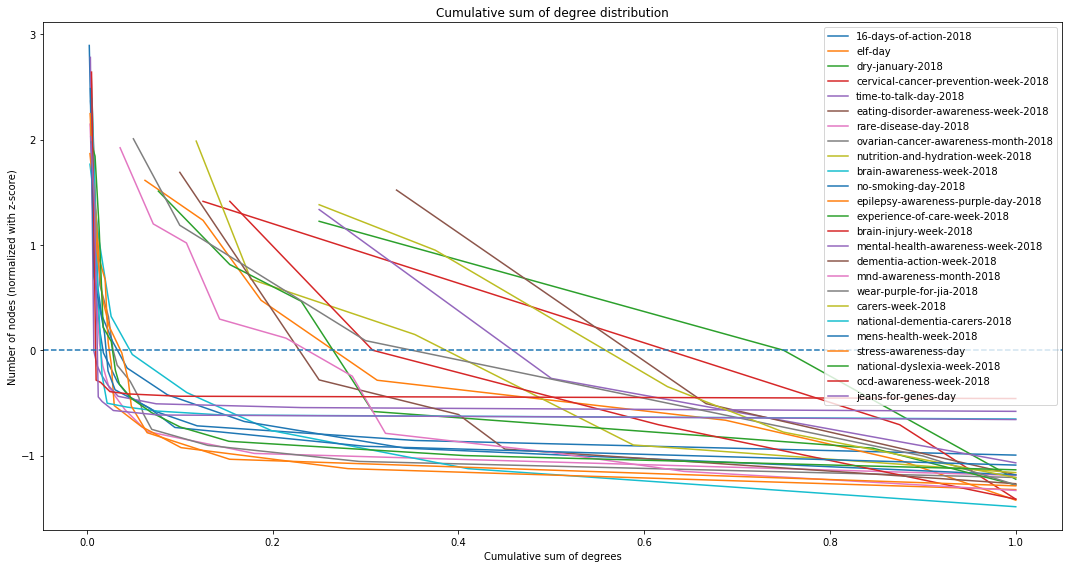

In [10]:
AnalysisHelper.plot_compare_cumsum_deg_dist(results);

Cumulative sum of degree distribution shows how the degree is distributed with respect to the number of nodes.

* Nodes with a lower degree (left on the plot) are typically way more than the ones with a high degree (right on the plot).

* Over the dotted line there's a number of node above the mean (the converse below the line) as per z-score.

* Z-score normalization for the number of nodes has been chosen because it preserves the range (maximum and minimum) and introduces the dispersion of the serie (standard deviation / variance)

\begin{align}
P(k) = \frac{\text{# nodes with degree >= k}}{\text{# nodes}}
\end{align}

Cumulative sum of degree distribution is more robust wrt the simple degree distribution because is less subject to small numbers. 

#### Summary stats for communities

In [11]:
AnalysisHelper.communities_summary_stats(results)

,values
degenerated_context_ratio,0.52
good_context_ratio,0.48
avg_communities_per_good_context,1.92
avg_sociable_users_ratio,0.06


Measures to detect the goodness of partitions from :
* *Degenerated context ratio*:
\begin{align}
\text{degenerated_context_ratio} = \frac{\text{# degenerated contexts}}{\text{# contexts}}
\end{align}
* *Good context ratio*: which is the reverse of the degenerated context ratio.
\begin{align}
\text{good_context_ratio} = \frac{\text{# good contexts}}{\text{# contexts}}
\end{align}
* *Average communities per context*: the average number of communities for number of contexts. Only considers good contexts.
\begin{align}
\text{avg_communities_per_good_context	} = \frac{\sum{\text{# good communities}}}{\text{# good contexts}}
\end{align}
* *Average sociable users ratio*: the average for the context number for the ratio of the users in the communities over the users found. Only considers good contexts.
\begin{align}
\text{avg_communities_per_good_context	} =
\frac{\sum{\frac{\text{# users in communities in context}}{\text{# all users in context}}}}
{\text{# good contexts}}
\end{align}

*note*: a "degenerated context" is a context for which the community detection algorithm hasn't found any community. Degenerated context provide then a unique great community which includes all the nodes of the network graph. A "good context" is the reverse: all the contexts for which the community detection algorithm has found at least a communtiy.

## Shared users analysis

#### Shared users and community detection

In [12]:
shared_nodes = AnalysisHelper.compare_common_nodes(results)
display(shared_nodes.is_present.value_counts())
display(shared_nodes)

False    116
True      44
Name: is_present, dtype: int64

,no_participations,is_present
alzheimerssoc,4,True
dementiauk,4,False
nhsengland,4,True
timetochange,4,True
carersuk,4,False
jenniej95408140,3,True
mindcharity,3,True
mentalhealth,3,True
cdcgov,3,True
headwayuk,3,True


Community detection process filters out users not belonging to any community.

In this table are listed all the users from all the contexts that belongs to more than one context. 

* *is_present* column: describes whether a user has survived the community detection process.
* *no_participations* column: counts how many contexts a user has been in.

**important**: no_participations below may differ for the fact that a user may have survived in a context but not other ones.

#### Shared users

In [13]:
shared_nodes = AnalysisHelper.get_common_nodes(results)
print(f'There are {len(shared_nodes.index)} shared nodes.')
display(shared_nodes.groupby('no_participations').count().name.to_frame().rename(columns={'name': 'count'}))
display(shared_nodes)

There are 44 shared nodes.


,count
no_participations,
2,40
3,4


,name,url,location,bio,follower_rank,no_participations
bcmhouston,BCMHouston,http://www.bcm.edu,"Houston, Texas",Baylor College of Medicine is a health science...,0.913093,3
tiffanykairos,Tiffany Kairos,http://www.tiffanykairos.com,"Medina, OH",Founder:,0.620881,3
tenofficial,TheEpilepsyNetwork,http://theepilepsynetwork.com/,United States,A voice of epilepsy awareness for all • Advoca...,0.672191,3
mentalhealth,Mental Health Fdn,http://www.mentalhealth.org.uk,UK,"The UK's charity for everyone's mental health,...",0.973755,3
ncidirector,Dr. Ned Sharpless,http://www.cancer.gov,"Bethesda, MD",Official Twitter account of Dr. Norman E. Shar...,0.892217,2
dogstrust,Dogs Trust,http://www.dogstrust.org.uk,London,"A dog is for life, not just for Christmas®",0.938648,2
timetochange,Time to Change,http://www.time-to-change.org.uk/,"England, UK",Too many people with mental health problems ar...,0.877825,2
mhall55nine,Michael Hall,http://www.xn--mhall55ninegmail-7lb.com,Post falls ID,musician and news junkie seeking my daily work...,0.573206,2
cdcgov,CDC,http://www.cdc.gov,"Atlanta, GA",CDC's official Twitter source for daily credib...,0.999762,2
nhsengland,NHS England,http://www.england.nhs.uk,None,"Health and high quality care for all, now and ...",0.992224,2


Number of appearances of nodes across different events togheter with Tw infos.

#### Shared users and events

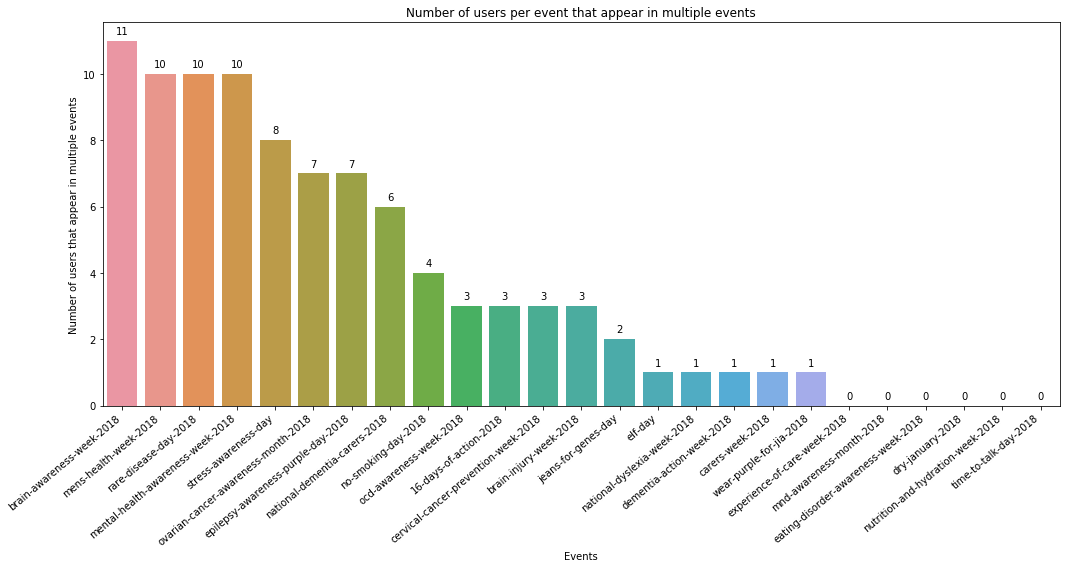

In [14]:
AnalysisHelper.plot_events_with_common_nodes(results, 'community_detection', 'nodes');

Number of users per event that appear in more than one event.

## Ranking

In [15]:
AnalysisHelper.rank_1()

,user_name,rank
0,tiffanykairos,2263.529428
1,tenofficial,1380.599989
2,bcmhouston,1248.375034
3,thepurplelilac,1222.869040
4,hhsgov,1196.467530
5,lorraine,1143.999994
6,cdcgov,1112.429652
7,noinvisibles,904.128214
8,us_fda,896.641040
9,alexisbortell,892.400018


Ranking function that takes into account:
* *Inverse in-degree*: In the considered graphs the hubs in the communities seems to be mostly related to associations and organizations. The smaller ones are more likely to be individuals.
* *Topical focus*: related to the interest the users have on the topic.

SQL code:
```sql
SELECT user_communities.user_id,
ifnull(sum(1/user_communities.indegree_centrality), 0) + ifnull(sum(user_events.topical_focus), 0) AS "rank"
FROM user_communities JOIN user_events ON user_communities.user_id == user_events.user_id
GROUP BY user_communities.user_id
ORDER BY rank DESC
```